# PCA 
Principal Component Analysis

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def readimageG(file):
    if(os.path.isfile(file)):
        I = Image.open(file).convert('L')
        return I
    return []

In [9]:
X = []
for i in range(1,400):
    file = "congress_db/db/"+str(i)+"c.jpg"
    img = readimageG(file)
    if(img):
        I = np.asarray(img)
        I = np.ravel(I)
        X.append(I)
X = np.asarray(X)
X.shape

(348, 7310)

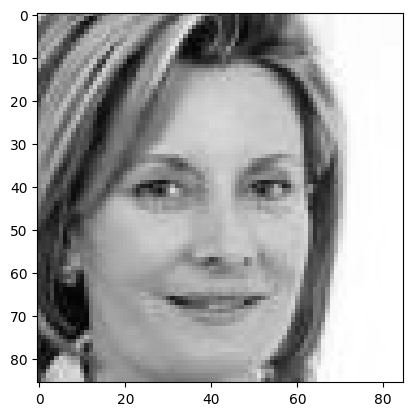

In [10]:
def showData(x):
    plt.imshow(x.reshape(86,85),cmap='gray',vmin=0, vmax=255)

showData(X[30,:])

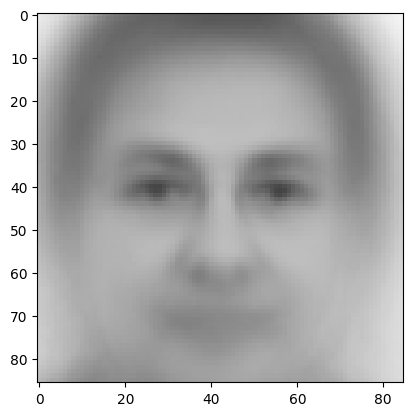

In [11]:
Xm = np.mean(X,axis=0)
showData(Xm)

In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
Xs = X - Xm
#X = preprocessing.scale(X)
N_COMP = 3
mod = PCA(n_components=N_COMP)
mod.fit(Xs)
ev = mod.explained_variance_ratio_
#ev

In [13]:
Xpca = mod.transform(Xs)
#Xpca[0,:]

In [14]:
eigenvec = mod.components_
evec_img = eigenvec.reshape(N_COMP,86,85)
#evec

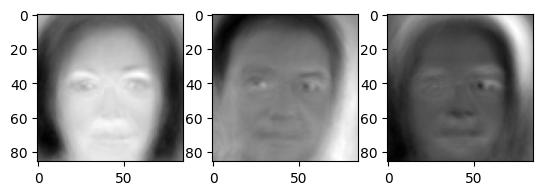

In [15]:
plt.subplot(131)
plt.imshow(evec_img[0],cmap='gray')
plt.subplot(132)
plt.imshow(evec_img[1],cmap='gray')
plt.subplot(133)
plt.imshow(evec_img[2],cmap='gray')


In [17]:
# Get index information
import csv
parlament = {}
with open('congress_db/index.csv','r') as csvfile:
    r = csv.reader(csvfile,delimiter=';')
    r.__next__()
    for row in r:
        # Add 'id' = (Name,Surname,Gender,Party) 
        parlament[int(row[0].strip())] = (row[1].strip(),row[2].strip(),row[3].strip(),row[4].strip())

Y = []
for i in range(1,400):
    file = "congress_db/db/"+str(i)+"c.jpg"
    img = readimageG(file)
    if(img):
        d = parlament[i]
        dipt = [str(i),*d]
        Y.append(dipt)
Y = np.asarray(Y)
Y

array([['1', 'Gonzalo', 'Robles Orozco', 'H', 'GP'],
       ['2', 'Francisco Miguel', 'Fernández Marugán', 'H', 'GS'],
       ['3', 'Arsenio', 'Fernández de Mesa Díaz del Río', 'H', 'GP'],
       ...,
       ['368', 'Verónica', 'Lope Fontagne', 'M', 'GP'],
       ['369', 'Julio César', 'Sánchez Fierro', 'H', 'GP'],
       ['370', 'José Ramón', 'Calpe Saera', 'H', 'GP']], dtype='<U30')

Text(0, 0.5, '2PC (9.27%)')

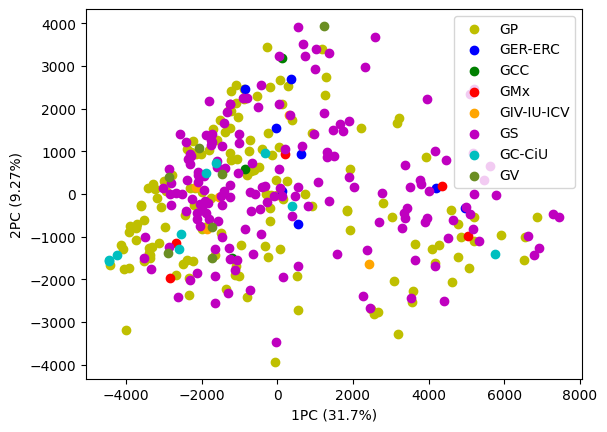

In [18]:
Yp = Y[:,4]
Sg = set(Yp)
colors = ['y','b','g','r','orange','m','c','olivedrab']
for it,g in enumerate(Sg):
    plt.scatter(Xpca[np.where(Yp==g),0],Xpca[np.where(Yp==g),1],c=colors[it])
plt.legend(Sg)
plt.xlabel('1PC ('+"%s" % float("%2.3g" % (100*ev[0])) + "%)")
plt.ylabel('2PC ('+"%s" % float("%2.3g" % (100*ev[1])) + "%)")

Text(0, 0.5, '2PC (9.27%)')

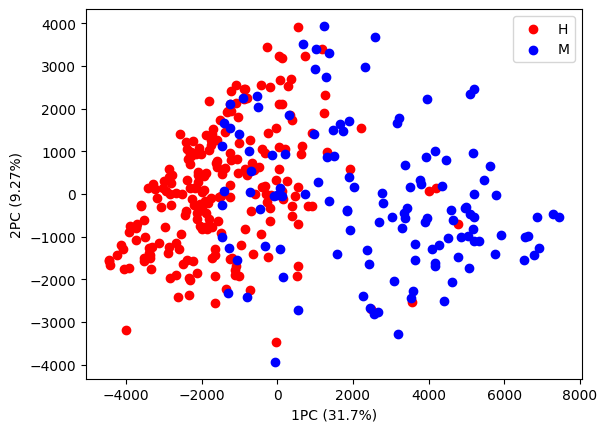

In [19]:
Yg = Y[:,3]
Sg = set(Yg)
colors = ['r','b','g','y','m','c','k','olivedrab']
for it,g in enumerate(Sg):
    plt.scatter(Xpca[np.where(Yg==g),0],Xpca[np.where(Yg==g),1],c=colors[it])
plt.legend(Sg)
plt.xlabel('1PC ('+"%s" % float("%2.3g" % (100*ev[0])) + "%)")
plt.ylabel('2PC ('+"%s" % float("%2.3g" % (100*ev[1])) + "%)")

# PCA used as a data compression tool

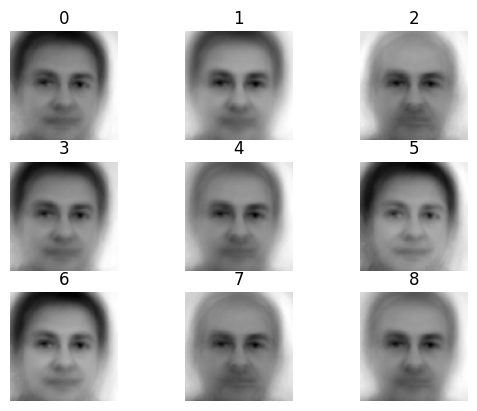

In [20]:
Is = np.matmul(Xpca,eigenvec)+Xm
for it in range(9):
    plt.subplot(3,3,it+1)
    plt.title(str(it))
    plt.axis('off')
    plt.imshow(Is[it].reshape(86,85),cmap='gray')

Total variance captured: 99.61034952341217


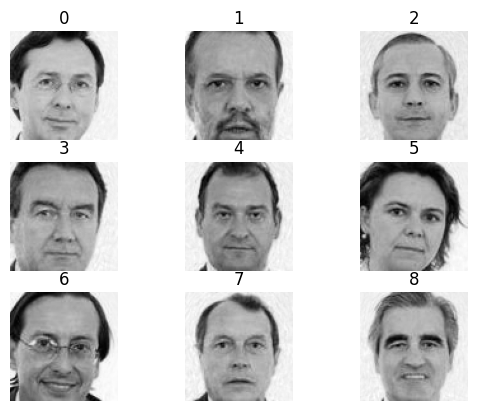

In [21]:
N_COMP2 = 300
mod2 = PCA(n_components=N_COMP2)
mod2.fit(Xs)
ev2 = mod2.explained_variance_ratio_
var = np.sum(ev2*100)
print('Total variance captured:', var)
Xpca2 = mod2.transform(Xs)
eigenvec2 = mod2.components_
Is = np.matmul(Xpca2,eigenvec2)+Xm
for it in range(9):
    plt.subplot(3,3,it+1)
    plt.title(str(it))
    plt.axis('off')
    plt.imshow(Is[it].reshape(86,85),cmap='gray')

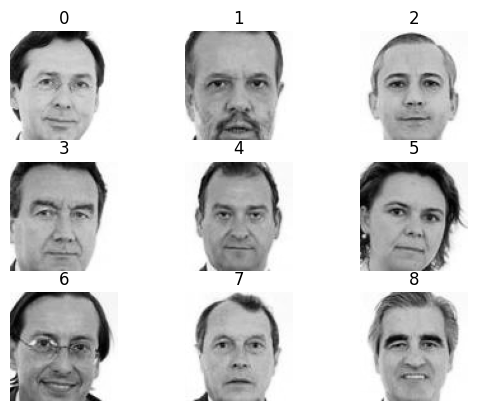

In [22]:
for it in range(9):
    plt.subplot(3,3,it+1)
    plt.title(str(it))
    plt.axis('off')
    plt.imshow(X[it].reshape(86,85),cmap='gray')

In [23]:
print(Xpca2.shape)
print(X.shape)

(348, 300)
(348, 7310)


# Image Generation

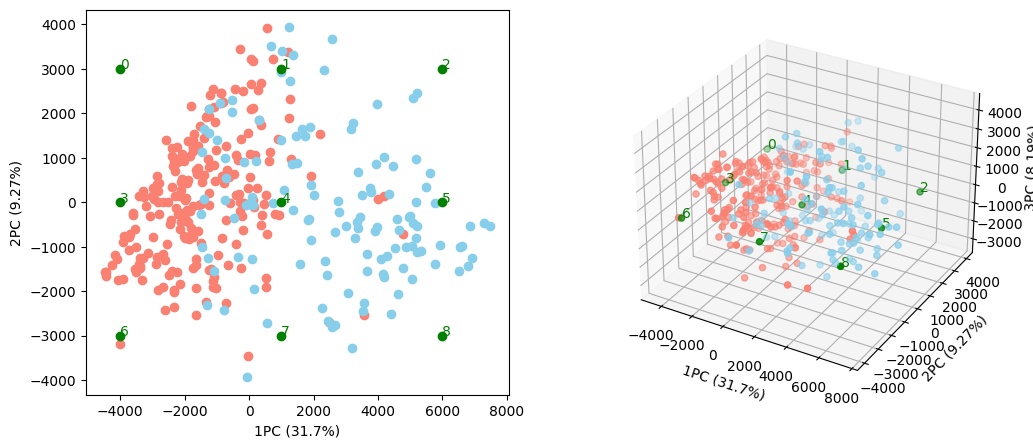

In [24]:
colors = ['salmon','skyblue','g']

Xgen_p = np.array([[-4000,3000],[1000,3000],[6000,3000],[-4000,0],[1000,0],[6000,0],[-4000,-3000],[1000,-3000],[6000,-3000]])
#Xgen_p = np.array([[-50,50],[10,50],[70,50],[-50,0],[10,0],[70,0],[-50,-50],[10,-50],[70,-50]])
extra_comp = np.zeros((Xgen_p.shape[0],N_COMP-Xgen_p.shape[1]))
Xgen = np.concatenate((Xgen_p,extra_comp),axis=1)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
for it,g in enumerate(Sg):
    ax1.scatter(Xpca[np.where(Yg==g),0],Xpca[np.where(Yg==g),1],c=colors[it])

ax1.set_xlabel('1PC ('+"%s" % float("%2.3g" % (100*ev[0])) + "%)")
ax1.set_ylabel('2PC ('+"%s" % float("%2.3g" % (100*ev[1])) + "%)")

ax1.scatter(Xgen[:,0],Xgen[:,1],c='g')
for it,x in enumerate(Xgen):
    ax1.text(x[0],x[1],str(it), color='g')

ax2 = fig.add_subplot(122,projection='3d')
for it,g in enumerate(Sg):
    ax2.scatter(Xpca[np.where(Yg==g),0],Xpca[np.where(Yg==g),1],Xpca[np.where(Yg==g),2],c=colors[it])

ax2.set_xlabel('1PC ('+"%s" % float("%2.3g" % (100*ev[0])) + "%)")
ax2.set_ylabel('2PC ('+"%s" % float("%2.3g" % (100*ev[1])) + "%)")
ax2.set_zlabel('3PC ('+"%s" % float("%2.3g" % (100*ev[2])) + "%)")

ax2.scatter(Xgen[:,0],Xgen[:,1],Xgen[:,2],c='g')
for it,x in enumerate(Xgen):
    ax2.text(x[0],x[1],x[2], str(it), color='g')



(9, 3)
(3, 7310)


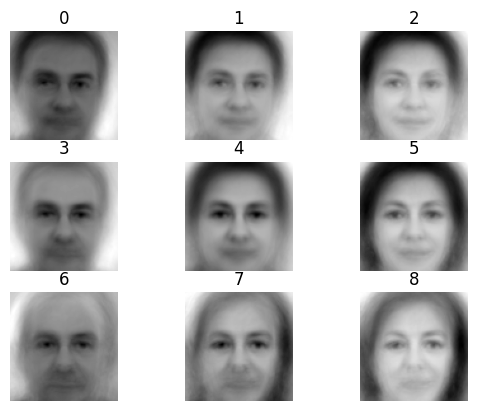

In [25]:
print(Xgen.shape)
print(eigenvec.shape)
Is = np.matmul(Xgen,eigenvec)+Xm
for it,x in enumerate(Xgen):
    plt.subplot(3,3,it+1)
    plt.title(str(it))
    plt.axis('off')
    plt.imshow(Is[it].reshape(86,85),cmap='gray')